# **Predicting House Sale Prices in Florida**

**Contributor**: Tiffany Chen, Vina Liu, Khoi Thai, Chloe Yin

https://colab.research.google.com/drive/1dKDDyJaSlpIJ0XQwFANTNxQhEk3Ue-hv?authuser=1#scrollTo=fpvGT-pqncMd

# **Problem Statement**

The housing market in Florida is known for being both highly dynamic and expensive. Many factors, such as property characteristics, location, and general market trends, influence house prices in complex ways.

The goal of this project is to develop a machine learning model that can predict the sale price of houses in Florida. The model will use property features like house size, number of bedrooms and bathrooms, and lot area to make predictions. This analysis can help buyers, sellers, real estate agents, and policymakers better understand price patterns and market behavior.


# **Dataset Info**

This dataset contains detailed information on residential real estate listings across the United States, including property characteristics, pricing, and location data. It is primarily used to analyze housing market trends, price distribution, and regional variations in property features such as lot size, house size, and the number of bedrooms or bathrooms. (link)

# **Insight from the Dataset**

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/BA810_Project/realtor-data.zip.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [ ]:
file_id = "16cSLOF4Xo9ZoT07tzuShyp-SgSKqT1Mh"
url = f"https://drive.google.com/uc?id={file_id}"

output = "realtor_data.csv"
gdown.download(url, output, quiet=False)

data = pd.read_csv(output)
data.info()

Downloading...
From (original): https://drive.google.com/uc?id=16cSLOF4Xo9ZoT07tzuShyp-SgSKqT1Mh
From (redirected): https://drive.google.com/uc?id=16cSLOF4Xo9ZoT07tzuShyp-SgSKqT1Mh&confirm=t&uuid=04fa6f7c-b099-4784-887b-20e538fea9f1
To: /content/realtor_data.csv
100%|██████████| 179M/179M [00:02<00:00, 75.4MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [ ]:
# Filter for non-missing prev_sold_date
data_with_sold_date= data.dropna(subset=["prev_sold_date"])
data_sold = data_with_sold_date[data_with_sold_date['status'] == 'sold']

# Find the state with the most non-missing prev_sold_date values
state_counts = data_sold["state"].value_counts()
most_common_state = state_counts.idxmax()
max_count = state_counts.max()

print(f"The state with the most non-missing 'prev_sold_date' values is '{most_common_state}' with {max_count} records.")
print(f"Number of records in {most_common_state}: {len(data_sold[data_sold['state'] == most_common_state])}")

# Filter the data for the most common state and display the head
most_common_state_data = data_sold[data_sold["state"] == most_common_state]
display(most_common_state_data.head())

The state with the most non-missing 'prev_sold_date' values is 'California' with 125013 records.
Number of records in California: 125013


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2022274,54422.0,sold,205000.0,3.0,2.0,0.39,1083212.0,Blythe,California,92225.0,1883.0,2021-11-18
2022281,54422.0,sold,151000.0,2.0,1.0,0.21,1525226.0,Blythe,California,92225.0,768.0,2021-11-24
2022282,109216.0,sold,109000.0,5.0,2.0,0.14,1197698.0,Blythe,California,92225.0,1368.0,2021-11-24
2022314,81166.0,sold,175000.0,3.0,1.0,0.16,1722555.0,Blythe,California,92225.0,1008.0,2021-12-10
2022334,4311.0,sold,134999.0,2.0,1.0,0.13,1809410.0,Blythe,California,92225.0,921.0,2021-12-16


In [ ]:
all_sold_data = data.dropna(subset=["prev_sold_date"])
all_sold_data = all_sold_data[all_sold_data['status'] == 'sold']

state_record_counts = all_sold_data['state'].value_counts()
top_5_states = state_record_counts.head(5).index.tolist()
top_5_state_counts_for_plot = state_record_counts[top_5_states]

print("Record counts for the top 5 states:")
print(top_5_state_counts_for_plot)

Record counts for the top 5 states:
state
California    125013
Florida        85592
Texas          80548
Washington     36923
Arizona        34126
Name: count, dtype: int64


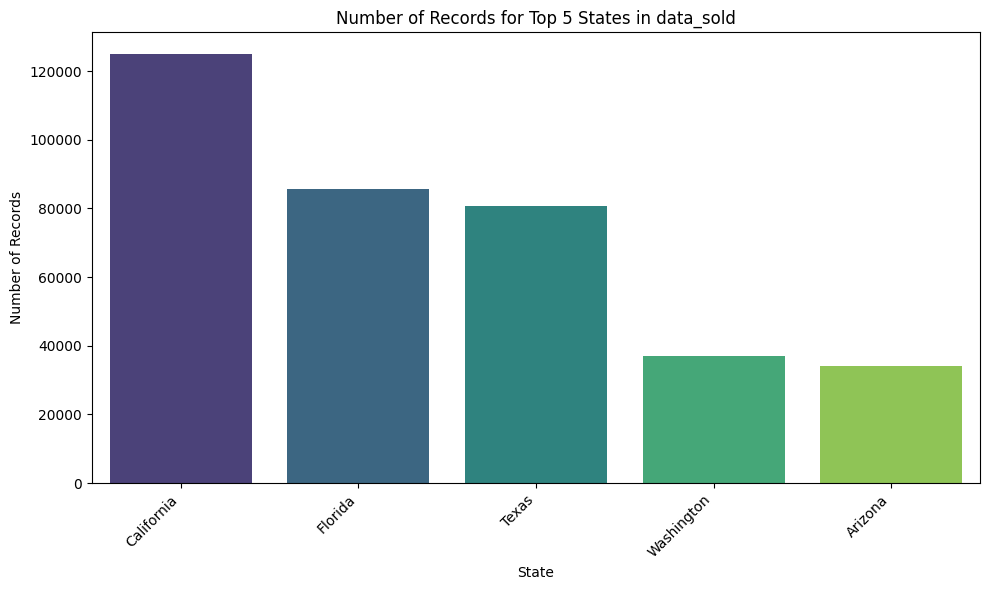

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_state_counts_for_plot.index, y=top_5_state_counts_for_plot.values, hue=top_5_state_counts_for_plot.index, palette='viridis', legend=False)
plt.title('Number of Records for Top 5 States in data_sold')
plt.xlabel('State')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Price for Top 5 States:
state
California    956004.628255
Washington    630904.738591
Arizona       444683.936910
Florida       391168.275949
Texas         381216.047127
Name: price, dtype: float64


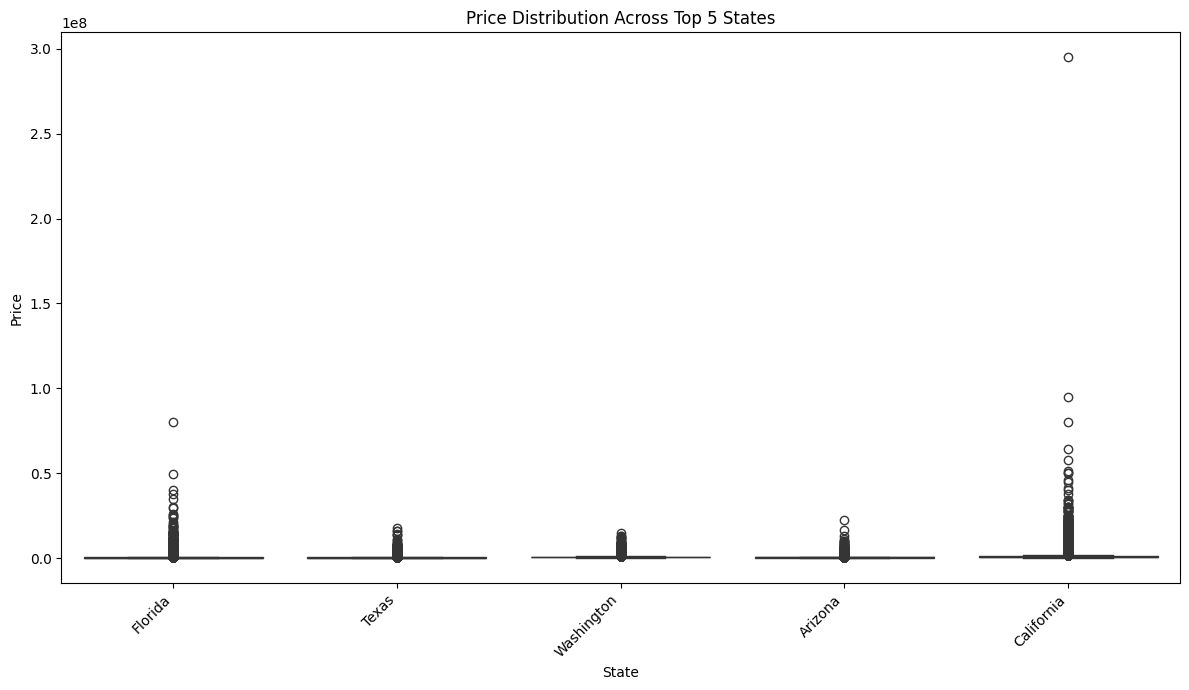

In [ ]:
top_5_states_data = all_sold_data[all_sold_data['state'].isin(top_5_states)]

# Calculate and print the average price for each of the top 5 states
average_prices = top_5_states_data.groupby('state')['price'].mean().sort_values(ascending=False)
print("Average Price for Top 5 States:")
print(average_prices)

plt.figure(figsize=(12, 7))
sns.boxplot(x='state', y='price', data=top_5_states_data, hue='state', palette='viridis', legend=False)
plt.title('Price Distribution Across Top 5 States')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
florida_data = data_sold[data_sold['state'] == 'Florida']

print("First 5 rows of Florida_data:")
display(florida_data.head())

print(f"Shape of california_data: {florida_data.shape}")

First 5 rows of Florida_data:


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1660423,53097.0,sold,434000.0,2.0,3.0,NaN,1791004.0,Fernandina Beach,Florida,32034.0,1150.0,2021-11-18
1660521,109187.0,sold,425000.0,4.0,2.0,NaN,760917.0,Fernandina Beach,Florida,32034.0,2146.0,2021-12-01
1660522,96737.0,sold,128500.0,NaN,NaN,0.26,874043.0,Yulee,Florida,32097.0,NaN,2021-12-01
1660526,85862.0,sold,659900.0,3.0,3.0,NaN,1811347.0,Fernandina Beach,Florida,32034.0,2579.0,2021-12-01
1660530,95127.0,sold,849000.0,4.0,5.0,NaN,1811623.0,Fernandina Beach,Florida,32034.0,3974.0,2021-12-06


Shape of california_data: (85592, 12)


In [ ]:
city_counts = florida_data['city'].value_counts()
top_10_cities_fl_counts = city_counts.head(10)
top_10_cities_fl = top_10_cities_fl_counts.index.tolist()

print("Top 10 cities in Florida with the most records:")
for city, count in top_10_cities_fl_counts.items():
    print(f"- {city}: {count} records")

Top 10 cities in Florida with the most records:
- Jacksonville: 4819 records
- Orlando: 4105 records
- Miami: 3565 records
- Tampa: 3400 records
- Port Charlotte: 2126 records
- Lehigh Acres: 2084 records
- Pensacola: 1897 records
- Saint Petersburg: 1894 records
- Cape Coral: 1839 records
- Kissimmee: 1792 records


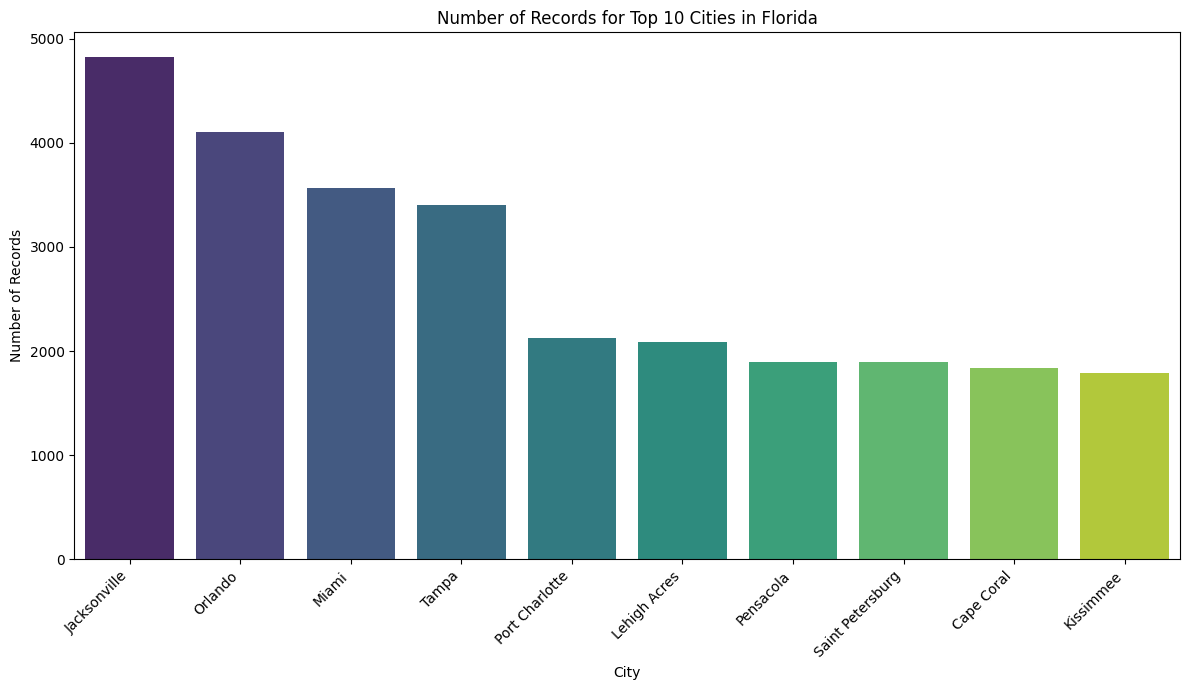

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_cities_fl_counts.index, y=top_10_cities_fl_counts.values, hue=top_10_cities_fl_counts.index, palette='viridis', legend=False)
plt.title('Number of Records for Top 10 Cities in Florida')
plt.xlabel('City')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

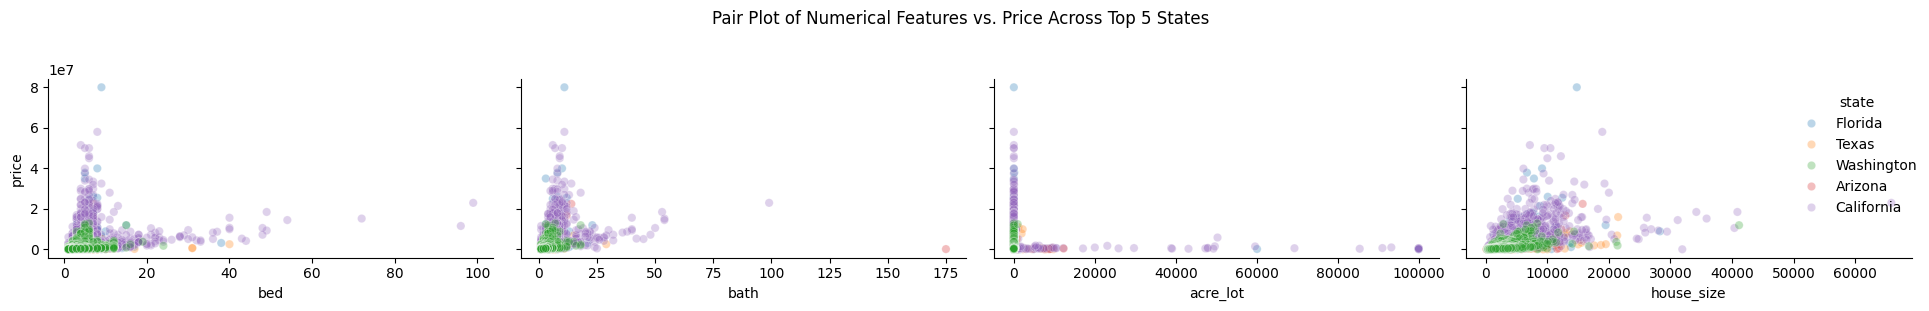

In [ ]:
numerical_cols = ['price', 'bed', 'bath', 'acre_lot', 'house_size']
sns.pairplot(top_5_states_data[numerical_cols + ['state']].dropna(),
             y_vars=['price'],
             x_vars=['bed', 'bath', 'acre_lot', 'house_size'],
             hue='state',
             height=3, aspect=1.5,
             plot_kws={'alpha': 0.3})
plt.suptitle('Pair Plot of Numerical Features vs. Price Across Top 5 States', y=1.02)
plt.tight_layout()
plt.show()

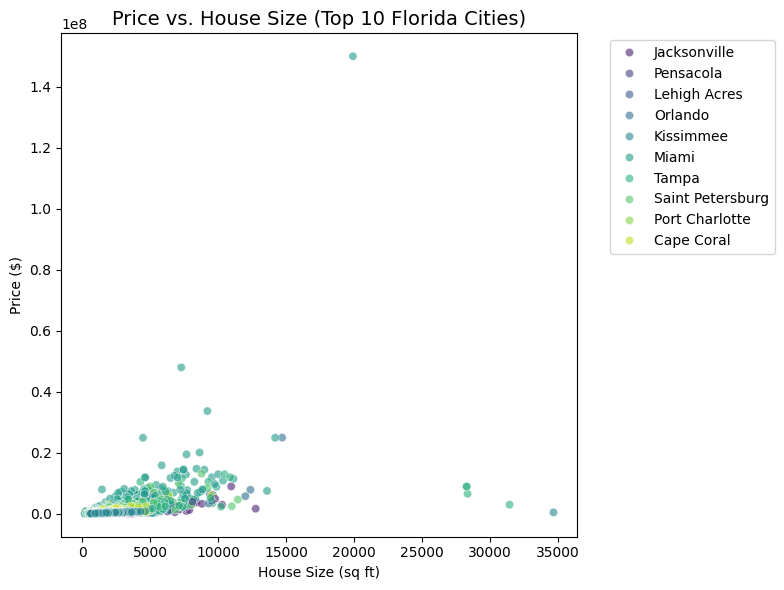

📊 Average Summary by City for Florida:


,avg_price,median_price,avg_beds,avg_baths,avg_size,records
city,,,,,,
Miami,851170.02,515000.0,2.62,2.35,1514.77,7307
Tampa,521421.99,359900.0,3.10,2.40,1774.78,5338
Saint Petersburg,501559.41,349900.0,2.60,1.99,1422.11,3034
Orlando,414637.70,330000.0,3.07,2.38,1750.90,6362
Kissimmee,393024.74,350000.0,3.69,2.95,1946.69,3097
Cape Coral,323431.92,249000.0,3.19,2.29,1851.91,5623
Jacksonville,318945.06,269900.0,3.17,2.21,1691.68,7657
Pensacola,294412.05,239900.0,3.08,2.14,1678.17,2304
Port Charlotte,145723.69,37500.0,2.85,2.10,1604.11,5410


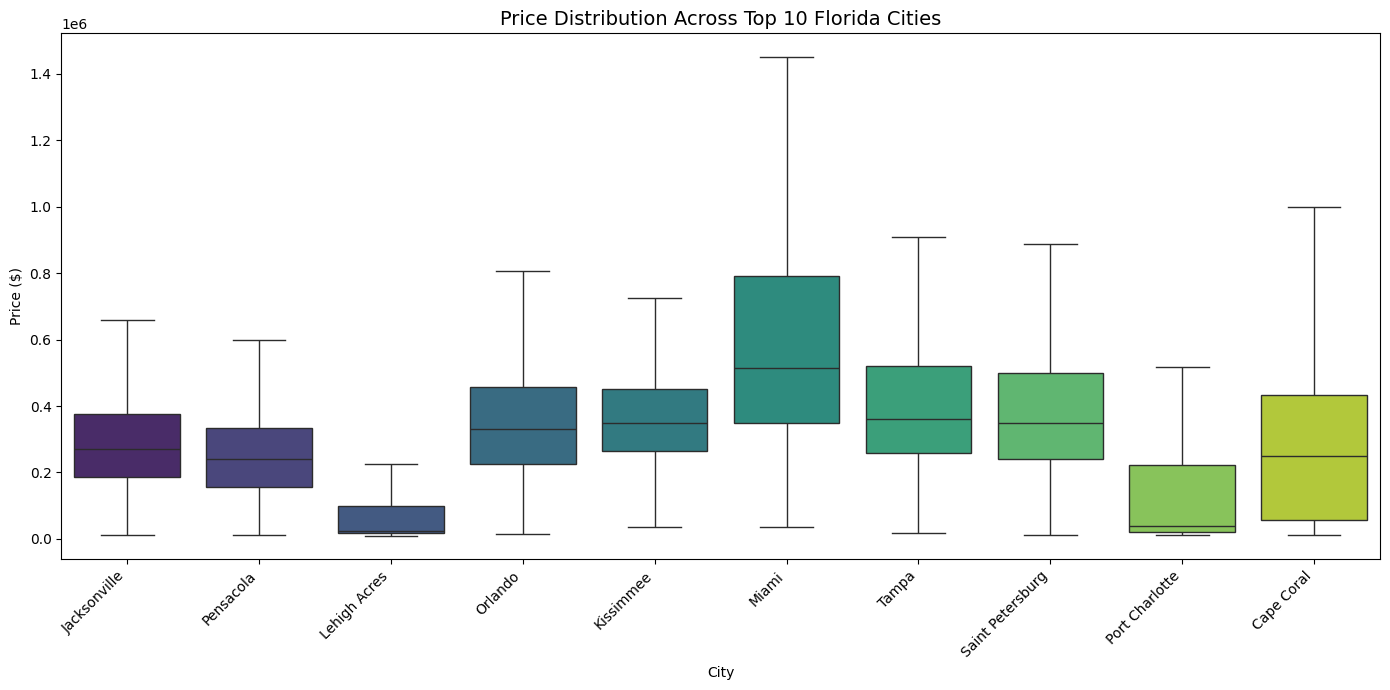

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


florida_data = data[data['state'] == 'Florida'].copy()

# Convert prev_sold_date to datetime
florida_data['prev_sold_date'] = pd.to_datetime(florida_data['prev_sold_date'], errors='coerce')

# Remove missing dates and unrealistic prices
florida_data = florida_data.dropna(subset=['prev_sold_date', 'price'])
florida_data = florida_data[florida_data['price'] > 10000]  # filter out anomalies

# Extract year for trend analysis
florida_data['sold_year'] = florida_data['prev_sold_date'].dt.year
florida_top = florida_data[florida_data['city'].isin(top_10_cities_fl)]

# Correlation: PRICE vs HOUSE SIZE
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=florida_top,
    x='house_size', y='price', hue='city',
    alpha=0.6, palette='viridis'
)
plt.title('Price vs. House Size (Top 10 Florida Cities)', fontsize=14)
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Average price by summary city
summary_stats = (
    florida_top.groupby('city')
    .agg(
        avg_price=('price', 'mean'),
        median_price=('price', 'median'),
        avg_beds=('bed', 'mean'),
        avg_baths=('bath', 'mean'),
        avg_size=('house_size', 'mean'),
        records=('price', 'count')
    )
    .round(2)
    .sort_values('avg_price', ascending=False)
)
print(" Average Summary by City for Florida:")
display(summary_stats)


plt.figure(figsize=(14, 7))
sns.boxplot(
    data=florida_top,
    x='city', y='price',
    hue='city', palette='viridis', showfliers=False, legend=False
)
plt.title('Price Distribution Across Top 10 Florida Cities', fontsize=14)
plt.xlabel('City')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1021092270.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


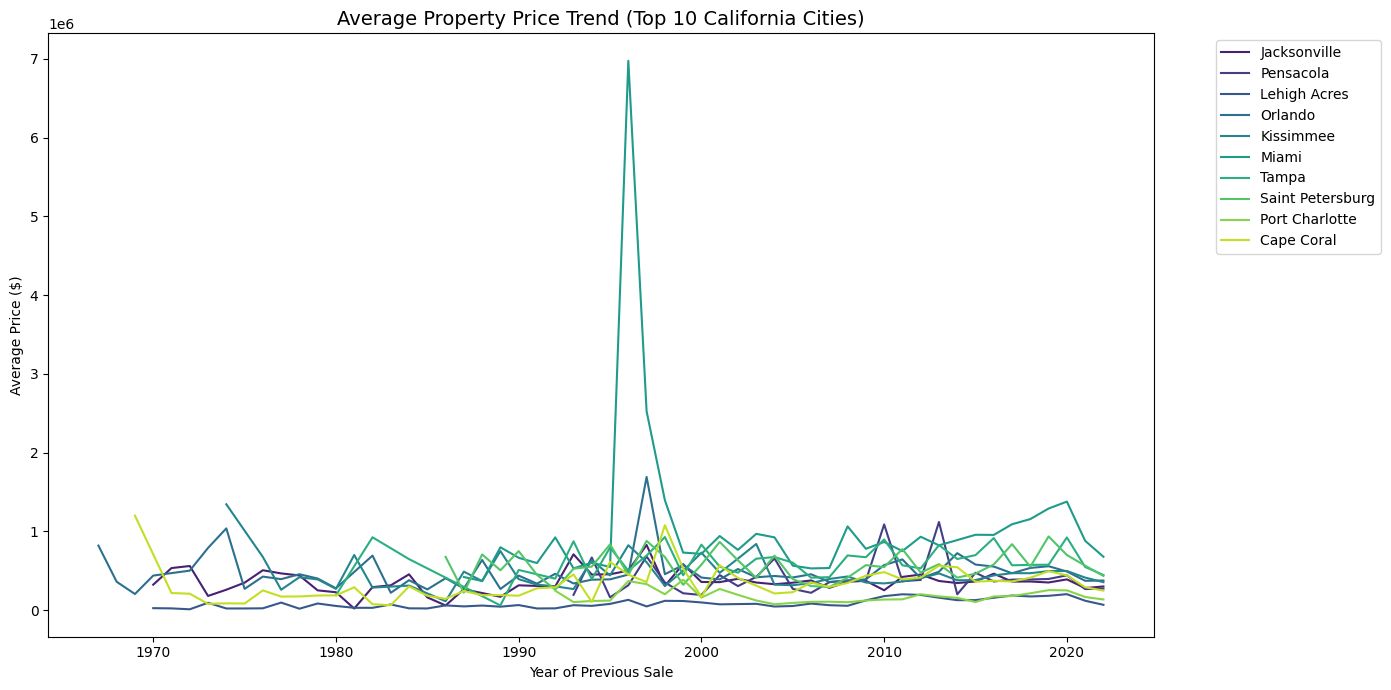

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=florida_top,
    x='sold_year', y='price',
    hue='city', palette='viridis',
    estimator='mean', ci=None
)
plt.title('Average Property Price Trend (Top 10 Florida Cities)', fontsize=14)
plt.xlabel('Year of Previous Sale')
plt.ylabel('Average Price ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Data Cleaning**

Based on initial exploration, we focused on predicting house prices specifically for Florida, ensuring a more consistent housing market and reducing geographic noise in the dataset. Additional cleaning steps were performed to improve data quality, handle outliers, and capture important relationships for modeling.

Dropped columns:

* `brokered_by`: highly sparse and not related to property characteristics

* `street`: extremely high cardinality and not practical for modeling

* `price`: replaced by a capped version to reduce outlier influence

* `acre_lot`, `zip_code`, `prev_sold_date`, `state`, `status`: no longer needed after feature engineering

Removed invalid values:

* Rows where `acre_lot` = 0 and `house_size` = 0 were eliminated, as they represent unrealistic property records.

Converted datatypes:

* `prev_sold_date` converted to datetime to calculate transaction recency

* `zip_code` was used to create an aggregate location feature and then dropped

Created derived numerical features:

* `sqft_lot`: converts acres into square feet

* `house_lot_ratio`: footprint of the house relative to the lot

* `room_per_sqft`: room density on the lot

* `room_house_ratio`: interior room density

* `years_since_sold`: recency of last sale, affects pricing

* `zip_average_price`: mean sale price by ZIP code, used as a location quality signal

Applied price capping (winsorization):

* Created `price_capped`, clipping prices to the 1st and 99th percentiles, removing extreme values and stabilizing model learning.

These preprocessing and feature engineering steps reduced noise, captured meaningful relationships, and improved the performance of all predictive models.

In [ ]:
# 1. Filter data to only Florida
data_sold = data_sold[data_sold['state'] == 'Florida']

# 2. Drop irrelevant columns
data_sold = data_sold.drop(columns=["brokered_by", "street"])

# 3. Remove missing data
data_sold = data_sold.dropna(subset=['price'])
data_sold = data_sold.dropna()

# 4. Remove invalid or unrealistic values
bad_rows = data_sold[data_sold['acre_lot'] == 0]
print("Number of rows where acre_lot == 0:", len(bad_rows))
data_sold = data_sold[data_sold['acre_lot'] > 0]
bad_rows2 = data_sold[data_sold['house_size'] == 0]
print("Number of rows where house_size == 0:", len(bad_rows2))
data_sold = data_sold[data_sold['house_size'] > 0]

# 5. ZIP code target encoding
zip_mean_price = data_sold.groupby("zip_code")["price"].mean()
data_sold["zip_average_price"] = data_sold["zip_code"].map(zip_mean_price)

# 6. Create derived/engineered features
data_sold['sqft_lot'] = data_sold['acre_lot'] * 43560
data_sold['house_lot_ratio'] = (data_sold['house_size'] / data_sold['sqft_lot']).round(2)
data_sold['room_per_sqft'] = (((data_sold['bed'] + data_sold['bath']) /
                               data_sold['sqft_lot']) * 100).round(2)
data_sold['room_house_ratio'] = (((data_sold['bed'] + data_sold['bath']) /
                                  data_sold['house_size']) * 100).round(2)

# 7. Calculate time since last sale
data_sold['prev_sold_date'] = pd.to_datetime(data_sold['prev_sold_date'], errors='coerce')
today = pd.Timestamp.today()
data_sold['years_since_sold'] = (today - data_sold['prev_sold_date']).dt.days / 365.25
data_sold['years_since_sold'] = data_sold['years_since_sold'].round(2)

# 8. Create capped price (winsorize at 1st and 99th percentiles)
lower_cap = data_sold['price'].quantile(0.01)
upper_cap = data_sold['price'].quantile(0.99)
data_sold['price_capped'] = data_sold['price'].clip(lower=lower_cap, upper=upper_cap)

# 9. Drop column that is no longer needed
cols_to_drop = ['price', 'acre_lot', 'zip_code', 'prev_sold_date', 'state', 'status']
data_sold = data_sold.drop(columns=cols_to_drop)

# 10. Preview processed data
data_sold.head()

Number of rows where acre_lot == 0: 26
Number of rows where house_size == 0: 0


,bed,bath,city,house_size,zip_average_price,sqft_lot,house_lot_ratio,room_per_sqft,room_house_ratio,years_since_sold,price_capped
1660576,4.0,3.0,Fernandina Beach,2630.0,627861.0,10018.8,0.26,0.07,0.27,3.69,521888.0
1660599,14.0,8.0,Fernandina Beach,4525.0,627861.0,40075.2,0.11,0.05,0.49,3.65,650000.0
1660607,3.0,2.0,Fernandina Beach,1461.0,627861.0,7405.2,0.20,0.07,0.34,3.66,489000.0
1660609,3.0,4.0,Fernandina Beach,1862.0,627861.0,4791.6,0.39,0.15,0.38,3.66,1075000.0
1660790,2.0,1.0,Hilliard,1470.0,303250.0,454330.8,0.00,0.00,0.20,4.08,365000.0


In [ ]:
data_sold.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51801 entries, 1660576 to 1759366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bed                51801 non-null  float64
 1   bath               51801 non-null  float64
 2   city               51801 non-null  object 
 3   house_size         51801 non-null  float64
 4   zip_average_price  51801 non-null  float64
 5   sqft_lot           51801 non-null  float64
 6   house_lot_ratio    51801 non-null  float64
 7   room_per_sqft      51801 non-null  float64
 8   room_house_ratio   51801 non-null  float64
 9   years_since_sold   51801 non-null  float64
 10  price_capped       51801 non-null  float64
dtypes: float64(10), object(1)
memory usage: 4.7+ MB


After filtering for Florida, removing missing values, and eliminating invalid entries (e.g., lot size = 0, house size = 0), the dataset was reduced from **2,226,382** rows to a cleaner and more reliable subset suitable for model training.

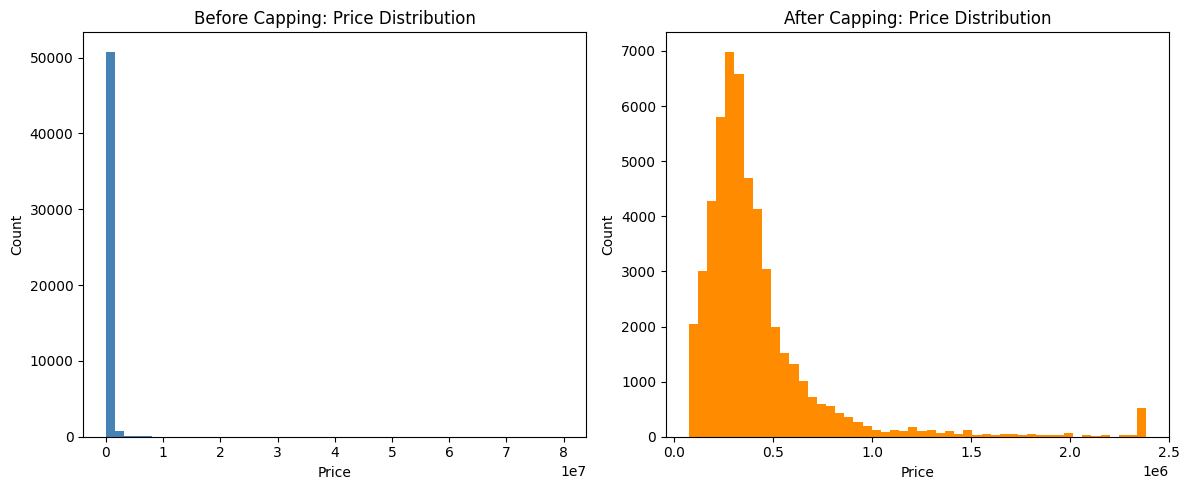

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data_sold['price'], bins=50, color='steelblue')
plt.title("Before Capping: Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
plt.hist(data_sold['price_capped'], bins=50, color='darkorange')
plt.title("After Capping: Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In the raw price distribution, nearly all observations appear compressed near zero because the histogram scale is dominated by a very small number of extreme luxury properties. These outliers pull the x-axis to the multi-million range, masking the true distribution. After capping at the 1st and 99th percentiles, the scale becomes more appropriate and the underlying price distribution is clearly revealed.

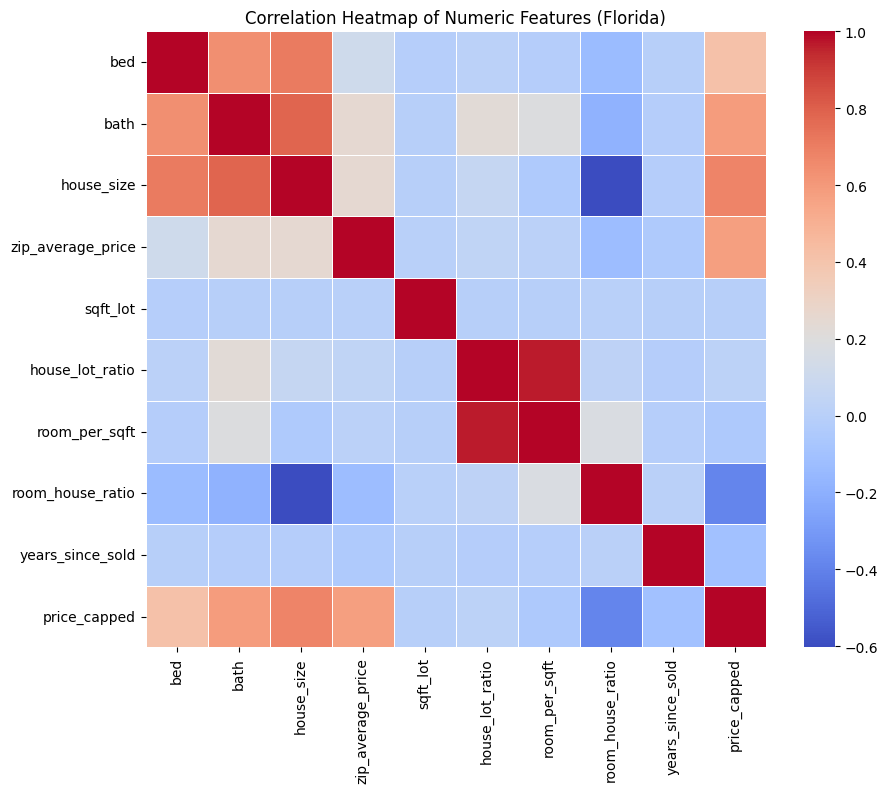

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_cols = data_sold.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_cols.corr(),
    cmap='coolwarm',
    annot=False,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numeric Features (Florida)")
plt.show()


The heatmap shows that `house_size`, `bathrooms`, `bedrooms`, and `zip_average_price` have the strongest positive relationships with price, while years_since_sold and room_house_ratio are weak or slightly negative, indicating they contribute less to predicting price.


# **Spliting and Preprocessing data**

Since our goal is to predict house prices in Florida, we set the target variable (y) to be the price column and used all remaining features as predictors (X). We then split the dataset into 70% training data and 30% test data.

In [ ]:
from sklearn.model_selection import train_test_split

X=data_sold.drop(columns=['price_capped'])
y=data_sold['price_capped']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

cats = ['city']
nums = ['bed','bath','sqft_lot', 'house_size','house_lot_ratio', 'room_per_sqft', 'room_house_ratio', 'years_since_sold', 'zip_average_price']
preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, nums),
    ('cat', cat_pipeline, cats)
], verbose_feature_names_out=False)
preprocess_pipeline.set_output(transform='pandas') # output as a pandas dataframe instead of numpy array

X_train_prepd = preprocess_pipeline.fit_transform(X_train)
X_test_prepd = preprocess_pipeline.transform(X_test)

In [ ]:
X_train

,bed,bath,city,house_size,zip_average_price,sqft_lot,house_lot_ratio,room_per_sqft,room_house_ratio,years_since_sold
1710821,4.0,3.0,Tampa,2944.0,525688.473282,5662.8,0.52,0.12,0.24,4.02
1745010,3.0,2.0,Springhill,1665.0,271137.022099,11761.2,0.14,0.04,0.30,3.66
1661379,3.0,4.0,McAlpin,2700.0,296162.500000,515314.8,0.01,0.00,0.26,3.74
1682737,2.0,2.0,Orlando,1254.0,273326.589928,6098.4,0.21,0.07,0.32,3.65
1711003,4.0,2.0,Pinellas Park,1254.0,302909.778947,6534.0,0.19,0.09,0.48,3.81
...,...,...,...,...,...,...,...,...,...,...
1693681,1.0,1.0,Cocoa,420.0,289604.049296,4356.0,0.10,0.05,0.48,3.72
1738097,2.0,1.0,Sarasota,930.0,248500.000000,8276.4,0.11,0.04,0.32,3.62
1730041,3.0,2.0,Port Charlotte,2395.0,394736.869565,20037.6,0.12,0.02,0.21,3.81
1733439,3.0,3.0,Fort Myers,1680.0,364951.875000,1306.8,1.29,0.46,0.36,3.75


In [ ]:
preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['bed', 'bath', 'sqft_lot', 'house_size',
                                  'house_lot_ratio', 'room_per_sqft',
                                  'room_house_ratio', 'years_since_sold',
                                  'zip_average_price']),
                                ('cat',
                                 Pipeline(steps=[('cat_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['city'])],
                  verbose_feature_names_out=False)

Only having one categorical feature does not harm our models or the project because the most important location effects are already captured numerically. Instead of using many categorical columns, we created `zip_average_price`, which summarizes neighborhood pricing patterns far more efficiently than one-hot encoding thousands of ZIP codes or street names. This feature gives the models a strong signal about location quality without adding unnecessary complexity. By keeping only **city** as a categorical variable, we avoid high-cardinality issues, reduce memory usage, and prevent overfitting, while still retaining enough location information to make accurate price predictions.


# **Model Selection**

#Linear Regression

###Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

lin_reg = Pipeline([
    ('prepare', preprocess_pipeline),
    ('regression', LinearRegression())
])

lin_reg.fit(X_train, y_train)

# Cross-validated scores
lin_reg_rmse_scores = cross_val_score(
    lin_reg, X_train, y_train,
    scoring="neg_root_mean_squared_error",
    cv=3
)

lin_reg_r2_scores = cross_val_score(
    lin_reg, X_train, y_train,
    scoring="r2",
    cv=3
)

print(f"Training Linear Regression RMSE: {(-lin_reg_rmse_scores).mean()}")
print(f"Training Linear Regression R2: {lin_reg_r2_scores.mean()}")
print(f"Target Variable Training Std. Deviation: {y_train.std()}")

Training Linear Regression RMSE: 174229.30778663993
Training Linear Regression R2: 0.7203073450311143
Target Variable Training Std. Deviation: 329602.09387070575


Linear Regression achieved RMSE = $174K and R² = 0.72, meaning the model explains about 72% of the differences in home prices. The prediction error is roughly half of the natural price variation, which is strong performance for a simple model. This indicates that the engineered features (lot size, room ratios, and especially average ZIP price) capture most of the price drivers in the housing market.

###Ridge Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


ridge_pipeline = Pipeline([
    ('prep', preprocess_pipeline),
    ('regression', Ridge(alpha=10))
])


#Cross-validated scores

ridge_rmse_scores = cross_val_score(
    ridge_pipeline, X_train, y_train,
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=-1
)

ridge_r2_scores = cross_val_score(
    ridge_pipeline, X_train, y_train,
    scoring="r2",
    cv=3,
    n_jobs=-1
)
print(f"Training Ridge Regression RMSE: {(-ridge_rmse_scores).mean()}")
print(f"Training Ridge Regression R2: {ridge_r2_scores.mean()}")
print(f"Target Variable Training Std. Deviation: {y_train.std()}")

Training Ridge Regression RMSE: 176643.06972726563
Training Ridge Regression R2: 0.7125898387960791
Target Variable Training Std. Deviation: 329602.09387070575


Ridge Regression resulted in RMSE = $177K and R² = 0.71, which is slightly worse than linear regression. This suggests that shrinking coefficients did not help improve accuracy, because the house price predictors do not suffer from severe multicollinearity. In the context of home price prediction, Ridge offers no additional benefit and does not capture more price structure than the basic linear model.

###Lasso Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso_pipeline = Pipeline([
    ('prep', preprocess_pipeline),
    ('regression', Lasso(alpha=1, max_iter=10000))
])

#Cross-validated Score
lasso_rmse_scores = cross_val_score(
    lasso_pipeline, X_train, y_train,
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=-1
)
lasso_r2_scores = cross_val_score(
    lasso_pipeline, X_train, y_train,
    scoring="r2",
    cv=3,
    n_jobs=-1
)
print(f"Training Lasso Regression RMSE: {(-lasso_rmse_scores).mean()}")
print(f"Training Lasso Regression R2: {lasso_r2_scores.mean()}")
print(f"Target Variable Training Std. Deviation: {y_train.std()}")

Training Lasso Regression RMSE: 174214.908915533
Training Lasso Regression R2: 0.7203665125769506
Target Variable Training Std. Deviation: 329602.09387070575


Lasso Regression produced RMSE = $174K and R² = 0.72, essentially matching the linear regression performance. Lasso normally improves models by removing unimportant features, but here most features are already informative for predicting house prices. The model still explains 72% of price variation, meaning Lasso did not reveal hidden sparsity or improve generalization.

##Decision to not include polynomial models and hyperparameter tuning

Hyperparameter tuning was not necessary for Linear Regression, Ridge, and Lasso because all three models produced nearly identical results, showing stable performance with R² around 0.72. This indicates that the housing price relationships in the engineered features are already largely linear and well-behaved, so additional adjustments to regularization strength would not meaningfully improve accuracy. In contrast, polynomial models were not suitable for this project because they dramatically increased the number of features, especially with one-hot encoded city variables, which led to memory issues, overfitting, and poor model performance. Overall, simpler linear approaches were both more efficient and more accurate for predicting house prices in this dataset.

# Decision Trees

### Decision Tree Regressor

[Text(0.5, 0.875, 'zip_average_price <= 0.6\nsquared_error = 108634544212.8\nsamples = 36260\nvalue = 413263.9'),
 Text(0.25, 0.625, 'house_size <= 0.8\nsquared_error = 47347796236.8\nsamples = 33302\nvalue = 360682.0'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'house_size <= -0.3\nsquared_error = 20600735441.9\nsamples = 28975\nvalue = 315086.3'),
 Text(0.0625, 0.125, 'squared_error = 11192160737.6\nsamples = 15618\nvalue = 250794.9'),
 Text(0.1875, 0.125, 'squared_error = 21117710339.3\nsamples = 13357\nvalue = 390260.5'),
 Text(0.375, 0.375, 'house_size <= 2.8\nsquared_error = 119310721676.0\nsamples = 4327\nvalue = 666005.8'),
 Text(0.3125, 0.125, 'squared_error = 69063612975.7\nsamples = 3963\nvalue = 616597.7'),
 Text(0.4375, 0.125, 'squared_error = 350429081597.9\nsamples = 364\nvalue = 1203929.9'),
 Text(0.75, 0.625, 'house_size <= 1.6\nsquared_error = 417047819902.9\nsamples = 2958\nvalue = 1005245.9'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'zip_average_p

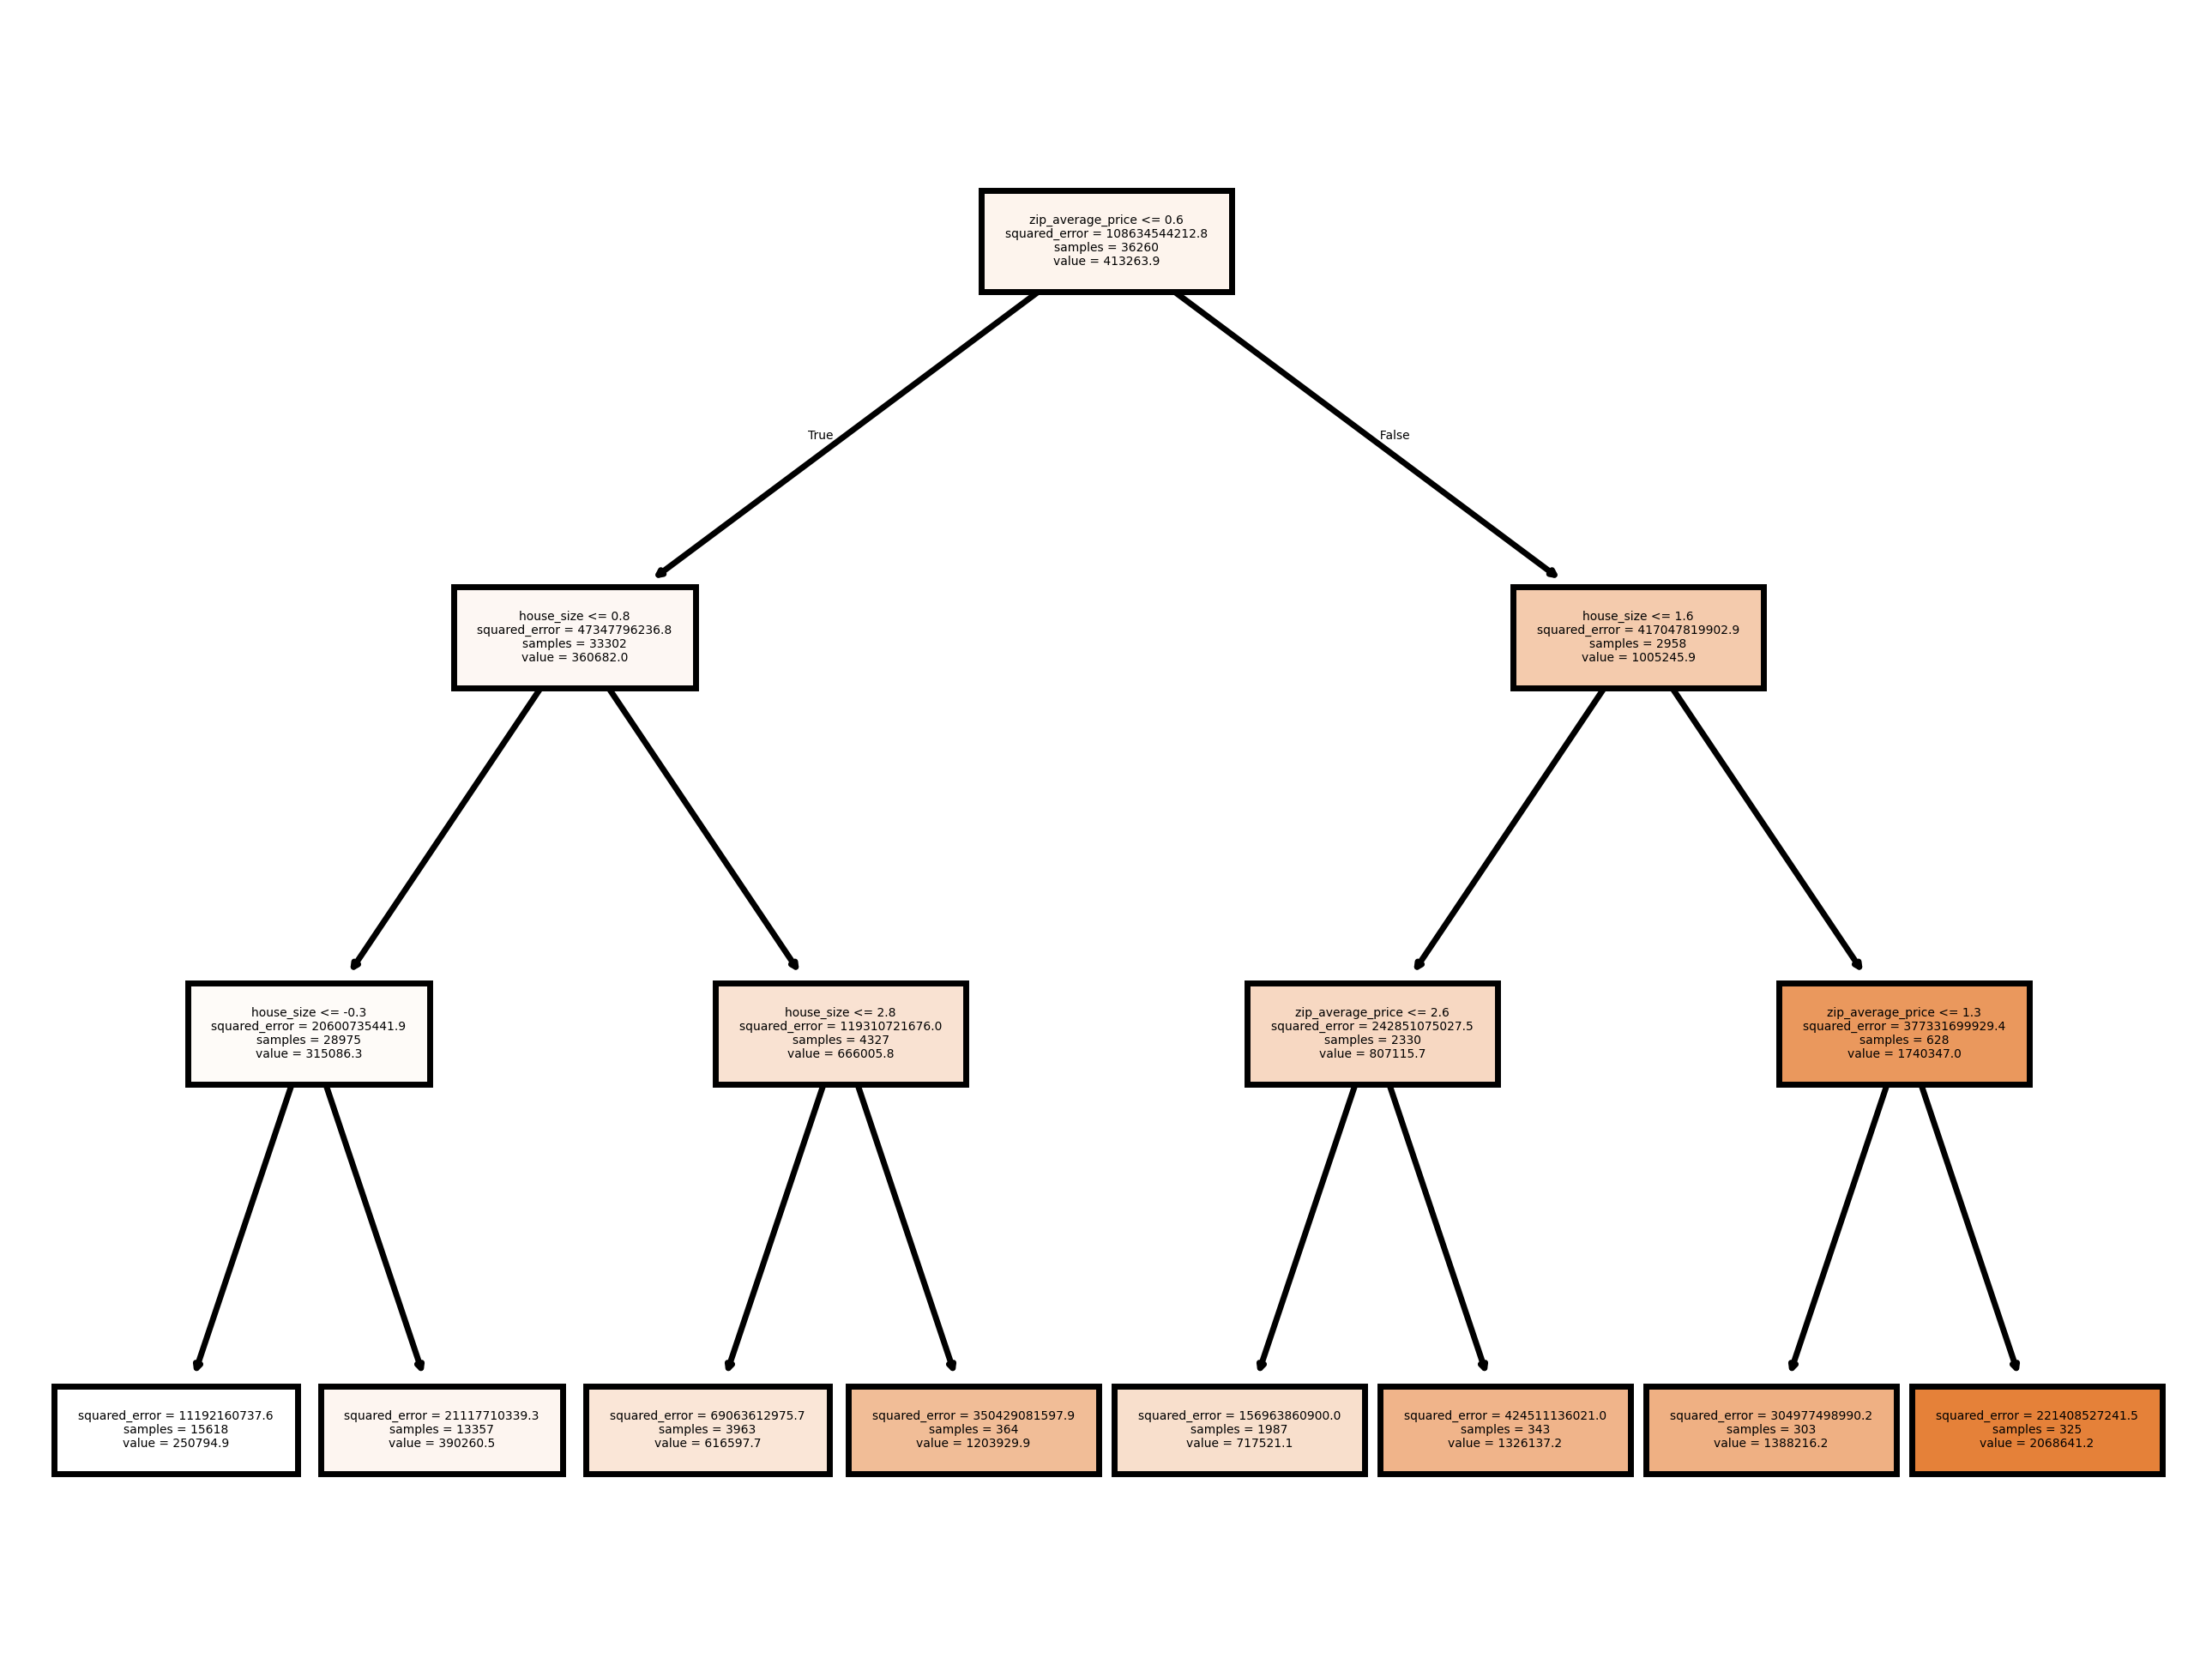

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_reg.fit(X_train_prepd, y_train)
plt.figure(dpi=500)
plot_tree(dt_reg, filled=True, feature_names=list(X_train_prepd.columns), precision=1, fontsize=2)

Using a basic Decision Tree Regressor and showing a graphical representation, we see that it values the zip_average_price variable the most.

Let's see how the basic model does before hyperparameter tuning.


In [ ]:
from sklearn.model_selection import cross_val_score

dt_reg_scores = cross_val_score(dt_reg, X_train_prepd, y_train, scoring="neg_root_mean_squared_error", cv=3)
print(f'Training Decision Tree RMSE: {(-dt_reg_scores).mean()}')
dt_reg_r2 = cross_val_score(dt_reg, X_train_prepd, y_train, scoring = "r2", cv=3)
print(f'Training Decision Tree Regression R2: {(dt_reg_r2).mean()}')
print(f'Target Variable Training Std. Deviation: {y_train.std()}')

Training Decision Tree RMSE: 205759.54952426287
Training Decision Tree Regression R2: 0.6098627406062161
Target Variable Training Std. Deviation: 329602.09387070575


The baseline Decision Tree model achieved RMSE = $206K and R² = 0.61, so it currently performs a bit worse than the Linear Regression model. It still explains about 61% of the variation in home prices, but the higher error suggests that this untuned tree is not using the features as efficiently. Next, we will use Random Search to tune key hyperparameters and see if a better tree structure can improve performance.


### Hyperparameter Tuning on Decision Tree Regressor using Random Seach

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint

dt_reg = Pipeline([('prep',preprocess_pipeline),('dt_reg',DecisionTreeRegressor())])

#parameter distributions
param_dist = {
    'dt_reg__max_depth': randint(2, 30),
    'dt_reg__min_samples_split': randint(2, 20),
    'dt_reg__min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(
    estimator=dt_reg,
    param_distributions=param_dist,
    n_iter=100,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
rs_results = pd.DataFrame(random_search.cv_results_)
rs_results.sort_values(by = 'rank_test_score', ascending = True, inplace=True)
rs_results[["param_dt_reg__max_depth", "param_dt_reg__min_samples_leaf","param_dt_reg__min_samples_split",
            "mean_test_score","rank_test_score"]].head(5)

,param_dt_reg__max_depth,param_dt_reg__min_samples_leaf,param_dt_reg__min_samples_split,mean_test_score,rank_test_score
72,9,7,19,0.736466,1
33,8,9,8,0.736212,2
41,8,9,16,0.736075,3
0,8,4,16,0.735902,4
94,7,6,14,0.735363,5


Our Random Search suggests a max_depth of 9, min_samples_leaf of 7, and min_samples_split of 19 are the best choices for hyperparameters. We can evaluate the RMSE below.

In [ ]:
dt_reg_scores = cross_val_score(random_search.best_estimator_, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3)
print(f'Training Decision Tree RMSE (Best Estimator): {(-dt_reg_scores).mean()}')
dt_reg_r2 = cross_val_score(random_search.best_estimator_, X_train, y_train, scoring = "r2", cv=3)
print(f'Training Decision Tree Regression R2 (Best Estimator): {(dt_reg_r2).mean()}')
print(f'Target Variable Training Std. Deviation: {y_train.std()}')

Training Decision Tree RMSE (Best Estimator): 169149.58313304096
Training Decision Tree Regression R2 (Best Estimator): 0.7362482860982539
Target Variable Training Std. Deviation: 329602.09387070575


After tuning, R² improves from 61% to 73%, RMSE drops from about 206K to 169K (a reduction of 37K), which is a meaningful improvement. To see if we can improve the tree even more, we next apply cost-complexity pruning.


### Cost Complexity Pruning on Decision Tree Regressor

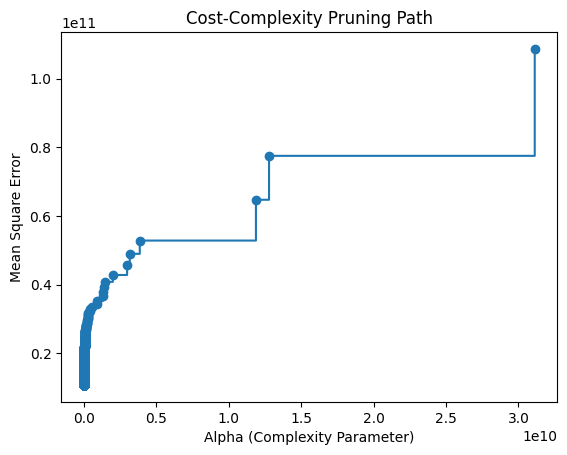

In [ ]:
dt_reg_full = DecisionTreeRegressor(random_state=42, max_depth = 16,
                                    min_samples_leaf=3,min_samples_split=8).fit(X_train_prepd, y_train)

path = dt_reg_full.cost_complexity_pruning_path(X_train_prepd, y_train)
dt_reg_ccp_alphas, dt_reg_impurities = path.ccp_alphas, path.impurities

plt.plot(dt_reg_ccp_alphas, dt_reg_impurities, marker='o', drawstyle='steps-post')
plt.xlabel('Alpha (Complexity Parameter)')
plt.ylabel('Mean Square Error')
plt.title('Cost-Complexity Pruning Path')
plt.show()

The cost-complexity pruning path returns a very large number of possible α values, and using all of them would be expensive. Therefore, we keep only a smaller subset of α values from this path and use that subset in our Randomized Search.


In [ ]:
dt_reg_ccp_alphas_truncated = dt_reg_ccp_alphas[::10]
alpha_param_dist = {'ccp_alpha':dt_reg_ccp_alphas_truncated}
ccp_random_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42),
    alpha_param_dist,
    n_iter=20,cv=3,scoring='r2')
ccp_random_search.fit(X_train_prepd, y_train)

ccp_grid_results = pd.DataFrame(ccp_random_search.cv_results_)
ccp_grid_results.sort_values(by='rank_test_score', ascending=True, inplace=True)
ccp_grid_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,5.016819,0.376113,0.035028,0.000788,1.840589e+07,{'ccp_alpha': 18405889.563032355},0.709123,0.703709,0.698414,0.703749,0.004372,1
3,6.178717,1.878745,0.036656,0.003086,1.107620e+07,{'ccp_alpha': 11076200.790795058},0.700567,0.691083,0.684157,0.691936,0.006727,2
9,5.088326,0.306731,0.036777,0.002620,8.249882e+06,{'ccp_alpha': 8249882.096918702},0.691558,0.687361,0.681043,0.686654,0.004321,3
17,5.233267,0.453340,0.037872,0.003497,5.565430e+06,{'ccp_alpha': 5565430.1632959545},0.685387,0.681475,0.674988,0.680616,0.004288,4
18,5.166191,0.292920,0.035455,0.000354,4.798286e+06,{'ccp_alpha': 4798286.1946534775},0.682296,0.678183,0.672185,0.677555,0.004152,5


With cost-complexity pruning on the truncated list of α values, the best pruned tree reaches a cross-validated R² of about 0.70, which is slightly lower than the  hyperparameters found through Randomized Search.

Next, we compare both models on the test data, to see if overfitting has occurred.


In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score
y_pred = ccp_random_search.best_estimator_.predict(X_test_prepd)
print(f'Test CCP RMSE: {root_mean_squared_error(y_test, y_pred)} \nTest CCP R2: {r2_score(y_test, y_pred)}')

y_pred2 = random_search.best_estimator_.predict(X_test)
print(f'\nTest Max_Depth RMSE: {root_mean_squared_error(y_test, y_pred2)} \nTest Max_Depth R2: {r2_score(y_test, y_pred2)}')

Test CCP RMSE: 175824.2137079817 
Test CCP R2: 0.7379775812572991

Test Max_Depth RMSE: 166260.55889330772 
Test Max_Depth R2: 0.7657068692737121


The hyperparameter tuning on max_depth does marginally better than the cost-complexity pruning done earlier. Now, we move to Random Forest Regression.


##Explanation on why Decision Tree did not outperform Linear Regression Models

Decision Tree did not outperform Linear Regression in this project because the engineered features created smooth, largely linear relationships that Linear Regression was able to capture very effectively. Variables such as `zip_average_price`, `house_lot_ratio`, and `years_since_sold` provided clear linear signals, reducing the benefit of complex tree-based splitting. In addition, price capping removed extreme values that Decision Tree would normally use to make strong splits, further limiting its advantage. Even after tuning, the Decision Tree model showed only modest improvement, indicating that the data structure favors simpler linear patterns rather than deep, nonlinear interactions.


# Random Forest

###Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=2,
    random_state=0,
    n_jobs=-1
)

rf.fit(X_train_prepd, y_train)

RandomForestRegressor(max_depth=20, n_jobs=-1, random_state=0)

In [ ]:
#evaluate
y_pred = rf.predict(X_test_prepd)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest RMSE:", rmse)
print("Random Forest R²:", r2)

Random Forest RMSE: 148266.58734716827
Random Forest R²: 0.8136764858812716


This result looks pretty good compared to the previous models. Let's see if hyperparameter tuning on it will improve the results.

### Hyperparameter tuning on RF with Random Search

In [ ]:
#build pipeline

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess_pipeline),
    ("rf", RandomForestRegressor(random_state=0))
])

In [ ]:
from scipy.stats import randint, uniform

param_distributions = {
    "rf__n_estimators": randint(100, 400),
    "rf__max_depth": randint(10, 40),
    "rf__min_samples_split": randint(2, 20),
    "rf__min_samples_leaf": randint(1, 10),
    "rf__max_features": uniform(0.3, 0.7)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=param_distributions,
    n_iter=10,
    cv=2,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    verbose=2,
    random_state=0
)

random_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['bed',
                                                                                'bath',
                                                                                'sqft_lot',
                                                                                'house_size',
                                                                                'house_lot_ratio',
                                                                                'room_per_sqft',
                                                                                'room_house_ratio',
                                                                                'years_since_sold',
                                                                                'zip_average_price']),
                                                                              ('cat',
                                                                               Pipeline(steps=[(...
                                        'rf__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x77fc7de33c80>,
                                        'rf__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x77fc7de32f00>,
                                        'rf__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x77fcac265ee0>},
                   random_state=0, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [ ]:
print("Best Parameters Found:")
print(random_search.best_params_)

Best Parameters Found:
{'rf__max_depth': 22, 'rf__max_features': np.float64(0.7149912327575128), 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 351}


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

best_model = random_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)

rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned Random Forest RMSE:", rmse_tuned)
print("Tuned Random Forest R²:", r2_tuned)

Tuned Random Forest RMSE: 146789.70522765646
Tuned Random Forest R²: 0.8173699322502895


The tuned Random Forest shows only a small improvement because the baseline model was already close to its optimal performance. Since Random Forests are naturally stable and regularized by averaging many trees, hyperparameter tuning tends to only fine-tune rather than change their behavior fundamentally. Due to strong feature engineering and outlier capping were already applied, the model had limited remaining variance to reduce, resulting in only marginal improvements.

# K Nearest Neighbors

### K Neighbors Regressor

We created a new target variable, price_capped, by clipping the top and bottom 1% of extreme home prices. Real-estate markets naturally contain rare but extreme outliers—such as multimillion-dollar luxury properties or unusually low distressed sales—that can distort model behavior.

Because KNN is highly sensitive to extreme target values, these outliers can disproportionately affect the distance-based averaging process and lead to unstable predictions.
Capping the target variable reduces the influence of these rare extremes and allows KNN to learn the broader, more representative price structure of the Florida housing market.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


cats = ['city']
nums = ['bed','bath','acre_lot', 'house_size',
        'house_lot_ratio', 'room_per_sqft',
        'room_house_ratio', 'years_since_sold']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, nums),
    ('cat', cat_pipeline, cats)
], verbose_feature_names_out=False)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

knn_base_pipe = Pipeline(steps=[
    ('preprocess', preprocess_pipeline),
    ('knn', KNeighborsRegressor())
])


knn_base_pipe.fit(X_train, y_train)

y_test_pred_base = knn_base_pipe.predict(X_test)
rmse_base = np.sqrt(mean_squared_error(y_test, y_test_pred_base))
r2_base   = r2_score(y_test, y_test_pred_base)

print("Baseline KNN Test RMSE:", rmse_base)
print("Baseline KNN Test R²  :", r2_base)
print(f"Target Variable Training Std. Deviation: {y_train.std()}")

Baseline KNN Test RMSE: 158634.7872304872
Baseline KNN Test R²  : 0.7867063410748961
Target Variable Training Std. Deviation: 329602.09387070575


The baseline KNN model achieved an RMSE of $158,635 and an R² of 0.787, meaning it explains about 79% of the variation in home prices. While this indicates that KNN captures a substantial amount of the underlying structure, the remaining error is still large relative to typical home values, suggesting notable prediction uncertainty. This is expected given the complexity of the dataset—Florida’s housing market is highly heterogeneous, the feature space becomes high-dimensional after one-hot encoding city information, and properties that appear close in feature space can still differ significantly in price. Overall, the baseline model performs reasonably well but remains clearly improvable, motivating the use of hyperparameter tuning to refine KNN’s predictive accuracy.

### Hyperparameter Tuning on K Neighbors Regressor using Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

knn_pipe = Pipeline(steps=[
    ('preprocess', preprocess_pipeline),
    ('knn', KNeighborsRegressor())
])

param_distributions = {
    'knn__n_neighbors': np.arange(3, 51),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

knn_random_search = RandomizedSearchCV(
    estimator=knn_pipe,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=2,
    n_jobs=-1,
    verbose=1,
    random_state=0
)

# Sample too big, use 30% of full dataset to train
# tune_frac = 0.3
# X_train_tune, _, y_train_tune, _ = train_test_split(
#    X_train, y_train, train_size=tune_frac, random_state=42)

# knn_random_search.fit(X_train_tune, y_train_tune)

knn_random_search.fit(X_train, y_train)

print("Best KNN params:", knn_random_search.best_params_)
print("Best CV RMSE (tuning):", -knn_random_search.best_score_)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
Best KNN params: {'knn__weights': 'distance', 'knn__p': 1, 'knn__n_neighbors': np.int64(12)}
Best CV RMSE (tuning): 158960.23099516734


In [ ]:
best_knn_pipe = knn_random_search.best_estimator_


best_knn_pipe.fit(X_train, y_train)

# Test set performance
y_test_pred_tuned = best_knn_pipe.predict(X_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_test_pred_tuned))
r2_tuned   = r2_score(y_test, y_test_pred_tuned)

print("Tuned KNN Test RMSE:", rmse_tuned)
print("Tuned KNN Test R²  :", r2_tuned)

Tuned KNN Test RMSE: 153641.06481107342
Tuned KNN Test R²  : 0.7999236756483015


After tuning KNN using RandomizedSearchCV, the best parameters were k = 12, distance weighting, and Manhattan distance (p = 1). The tuned model achieved a test RMSE of $153,641 and an R² of 0.800, showing a modest improvement over the baseline. While tuning refined the neighborhood structure, the performance gain remained limited, suggesting that KNN has only moderate room for improvement and is less effective than tree-based models for this dataset

#Gradient Boosting

###Extreme Gradient Boosting (XGBOOST)

In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

#Define XGBoost regressor

xgb_reg = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    tree_method="hist",
    n_jobs=-1
)

#Build pipeline using existing preprocess_pipeline

xgb_pipeline = Pipeline([
    ('prep', preprocess_pipeline),
    ('model', xgb_reg)
])

#Cross-validated Score
xgb_rmse_scores = cross_val_score(
    xgb_pipeline,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=-1
)


xgb_r2_scores = cross_val_score(
    xgb_pipeline,
    X_train,
    y_train,
    scoring="r2",
    cv=3,
    n_jobs=-1
)

print(f"Training XGBoost RMSE: {(-xgb_rmse_scores).mean()}")
print(f"Training XGBoost R2: {xgb_r2_scores.mean()}")
print(f"Target Variable Training Std. Deviation: {y_train.std()}")


Training XGBoost RMSE: 140063.32220585522
Training XGBoost R2: 0.8190681936350579
Target Variable Training Std. Deviation: 329602.09387070575


The baseline XGBoost model achieved an RMSE of about 140K and an R^2 of roughly 0.82, indicating that it can explain around 82% of the variation in Florida home prices. This is strong performance for real estate data, where prices naturally vary widely. An average error of 140K is much smaller than the natural price spread of about 330K, meaning the model is successfully capturing the main factors that influence house values, such as location (ZIP average price), property size, and structural features. Overall, the baseline XGBoost model provides highly accurate predictions and represents a strong fit for this house price prediction task.


###Hyperparameter tuning on XGBoost using Random Search

We don’t need to tune XGBoost for this project since the baseline is already the strongest model, but a light hyperparameter search is a nice bonus. Because it shows rigor and might squeeze out a bit more performance or confirm that the baseline XGBoost model is near-optimal.

In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Base XGBoost model
xgb_base = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

# Pipeline with existing preprocessing
xgb_pipe = Pipeline([
    ("prep", preprocess_pipeline),  # uses num+cat transformers
    ("model", xgb_base)
])

# Hyperparameter search space (small but reasonable)
param_distributions = {
    "model__n_estimators": [300, 500, 800, 1000],
    "model__max_depth": [4, 6, 8, 10],
    "model__learning_rate": [0.01, 0.03, 0.05, 0.1],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0],
    "model__min_child_weight": [1, 3, 5],
    "model__gamma": [0, 0.1, 0.3]
}

#Randomized search
xgb_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_distributions,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

from sklearn.model_selection import train_test_split
X_train_tune, _, y_train_tune, _ = train_test_split(
    X_train, y_train, train_size=0.3, random_state=42
)
xgb_search.fit(X_train_tune, y_train_tune)

xgb_search.fit(X_train, y_train)

print("Best XGBoost params:", xgb_search.best_params_)
print("Best CV RMSE (tuning):", -xgb_search.best_score_)

# Evaluate tuned model on test set
best_xgb = xgb_search.best_estimator_
y_pred_test = best_xgb.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print("Tuned XGBoost Test RMSE:", test_rmse)
print("Tuned XGBoost Test R²:", test_r2)
print("Target Variable Training Std. Deviation:", y_train.std())


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best XGBoost params: {'model__subsample': 0.8, 'model__n_estimators': 300, 'model__min_child_weight': 1, 'model__max_depth': 8, 'model__learning_rate': 0.1, 'model__gamma': 0.3, 'model__colsample_bytree': 0.8}
Best CV RMSE (tuning): 139230.45190634436
Tuned XGBoost Test RMSE: 142047.57629617726
Tuned XGBoost Test R²: 0.8289792765144591
Target Variable Training Std. Deviation: 329602.09387070575


Hyperparameter tuning result confirm our prediction as it slightly improved the XGBoost model, increasing R^2 from 0.819 to 0.829 while keeping RMSE at a similar level. This indicates that the baseline XGBoost configuration was already near optimal for this dataset, and tuning provided only a small performance gain by refining tree depth, sampling, and learning rate.

# **Challenges**

A key challenge in this project was the large amount of price variation within the dataset. Home prices in Florida ranged from very low to extremely high values, creating significant outliers and skewed distributions that could easily mislead models and increase prediction error. In addition, the dataset contained features with very different scales, such as lot size measured in acres versus house size in square feet, and included strong location effects where similar homes could be priced very differently based on ZIP code. To address these issues, feature engineering played an important role: creating variables such as `house_lot_ratio`, `room_per_sqft`, and `zip_average_price` helped express important relationships more directly. Applying a price cap to the extreme high‐ and low‐end prices also reduced noise, making the learning process more stable. These adjustments improved model performance across all algorithms, particularly for the linear models, which benefited from smoother and more consistent patterns in the data.


# **Conclusion**

This project demonstrates that predictive modeling is an effective approach for estimating residential house prices in Florida. Several models achieved strong performance, with R² values exceeding 0.70, indicating that the models are able to capture a large portion of the underlying price variation. These results suggest that machine learning models can be valuable tools for real estate valuation and market analysis.

Among all the models tested, XGBoost delivered the best overall performance, achieving the lowest RMSE and the highest R². Its strong results come from its ability to model complex, nonlinear relationships and interactions between features such as location (ZIP-level average prices), house size, lot size, and time-related variables. Random Forest also performed well by reducing overfitting through ensemble averaging, but it was slightly less accurate than XGBoost. Models such as Linear Regression and Decision Tree showed more limitations due to their simpler structure, while Decision Tree performance improved significantly after hyperparameter tuning and pruning.

A key challenge in this project was the large variation in Florida home prices, including extreme outliers and skewed distributions that could easily mislead models. We also had to handle very different feature scales and strong location effects, where similar homes could be priced very differently across ZIP codes. To address these issues, we relied on feature engineering (e.g., house_lot_ratio, room_per_sqft, zip_average_price) and price capping to reduce noise and stabilize model training.

Overall, our results suggest that XGBoost is the most reliable model for predicting Florida house prices in this dataset. With more informative features and some additional tuning, its accuracy and usefulness in real-world valuation tasks could be further improved.




## **Generative AI Disclosure**

We used AI, primarily ChatGPT to assist with written portions: checking grammar, spelling, cohesiveness, and flow. We also used AI to check our code and models to make sure that we were able to fully understand the outputs correctly.